# Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
[item.shape for item in (X_train, y_train, X_test, y_test)]    

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]

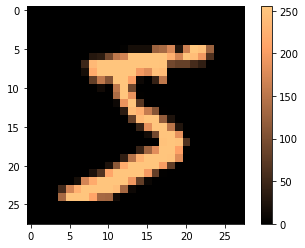

In [4]:
plt.imshow(X_train[0], cmap='copper')
plt.colorbar()

The values of X range from 0 to 255, we need to scale it down to 0 to 1.0 for best result.

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

We need to convert y label to one-hot encoding before we can use neural network as model.

# Preprocessing

We need to add color channel as the last dimension to X input to fit the requirement of Conv2D layer.

In [6]:
X_train, X_test = X_train.reshape(*X_train.shape, 1), X_test.reshape(*X_test.shape, 1)

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
X_train, X_test = X_train/255, X_test/255

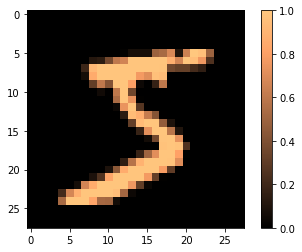

In [9]:
plt.imshow(X_train[0], cmap='copper')
plt.colorbar()

In [10]:
y_train, y_test = (tf.keras.utils.to_categorical(y) for y in (y_train, y_test))

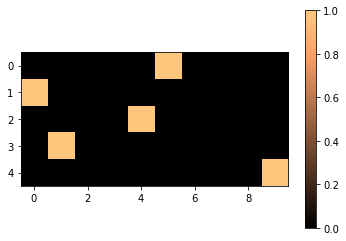

In [11]:
plt.imshow(y_train[:5], cmap='copper')
plt.colorbar()

Now each X input is a 28x28 array with values between 0 and 1 and each y label is a one-hot encoded vector.

# Model

Since the inputs are images, and the task is to classify them, convolution neural network seems to be a suitable model.

In [12]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [13]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
if os.path.isfile('model.h5'):
    model = tf.keras.models.load_model('model.h5')
    print('Load model successfully')

Load model successfully


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 20)        200       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 20)        3620      
_________________________________________________________________
flatten (Flatten)            (None, 11520)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1474688   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,479,798
Trainable params: 1,479,798
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=3,
          validation_split = 0.2)

Epoch 1/3
375/375 [==============================] - 37s 99ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.0586 - val_accuracy: 0.9860
Epoch 2/3
375/375 [==============================] - 35s 95ms/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 0.0623 - val_accuracy: 0.9842
Epoch 3/3
375/375 [==============================] - 36s 95ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0602 - val_accuracy: 0.9873


During train, train_acc increase with val_acc, and both having similar value, we conclude there is not much overfitting.

In [18]:
model.save('model.h5')

# Evaluation

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print(f'Test loss: {test_loss:.6f}, Test acc: {test_accuracy:.2%}')

79/79 [==============================] - 2s 24ms/step - loss: 0.0499 - accuracy: 0.9878
Test loss: 0.049899, Test acc: 98.78%


In [20]:
y_test_pred = model.predict(X_test)

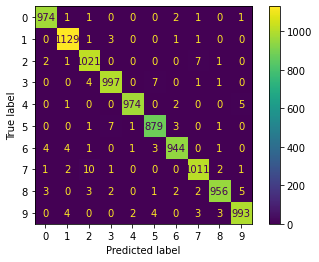

In [21]:
cmat = confusion_matrix(
    y_true=y_test.argmax(axis=1), 
    y_pred=y_test_pred.argmax(axis=1))
ConfusionMatrixDisplay(cmat).plot()

# Application

In [22]:
def application(idx=None):
    if idx is None:
        idx = np.random.randint(len(X_test))
    print('Collected new features as follows:')
    plt.imshow(X_test[idx], cmap='copper')
    plt.show()
    forecasted = np.argmax(model.predict(X_test[idx:idx+1])[0])
    actual = np.argmax(y_test[idx])    
    print(f'\n{"CORRECT" if forecasted==actual else "WRONG"}')
    print(f'\nModel forecasted as {forecasted}')
    print(f'\nActual data should be {actual}')

Collected new features as follows:


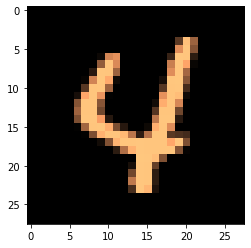


CORRECT

Model forecasted as 4

Actual data should be 4


In [23]:
application()